In [22]:
import numpy as np

fruits = np.load('C:/shjung/pythonExam/ex/data/fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)
# fruits_2d = fruits.reshape(-1, 50*50)

In [23]:
from sklearn.decomposition import PCA


In [24]:
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [25]:
pca.n_components_, pca.components_.shape

(50, (50, 10000))

In [26]:
pca.components_.shape, pca.components_.ndim

((50, 10000), 2)

In [27]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

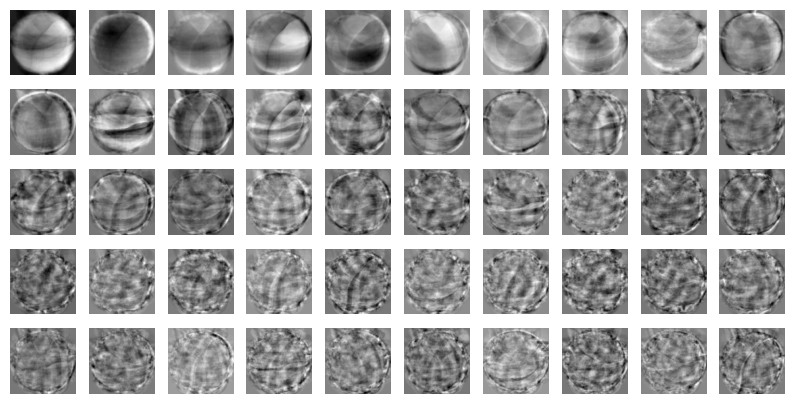

In [28]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

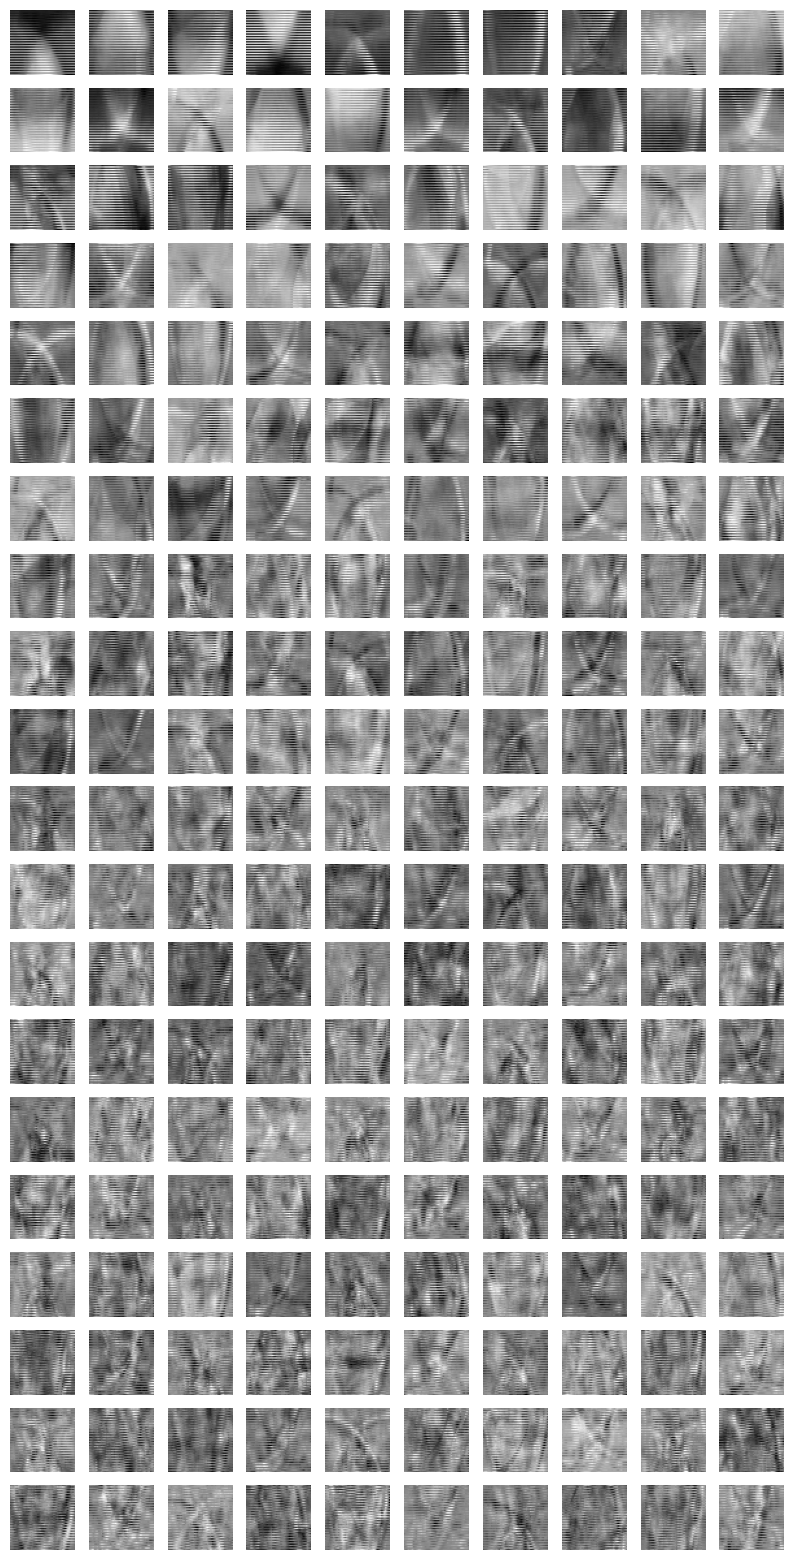

In [32]:
draw_fruits(pca.components_.reshape(-1, 50, 50))

In [29]:
print(fruits_2d.shape)

(300, 10000)


In [30]:
fruits_pca = pca.transform(fruits_2d)

In [31]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [33]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [34]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

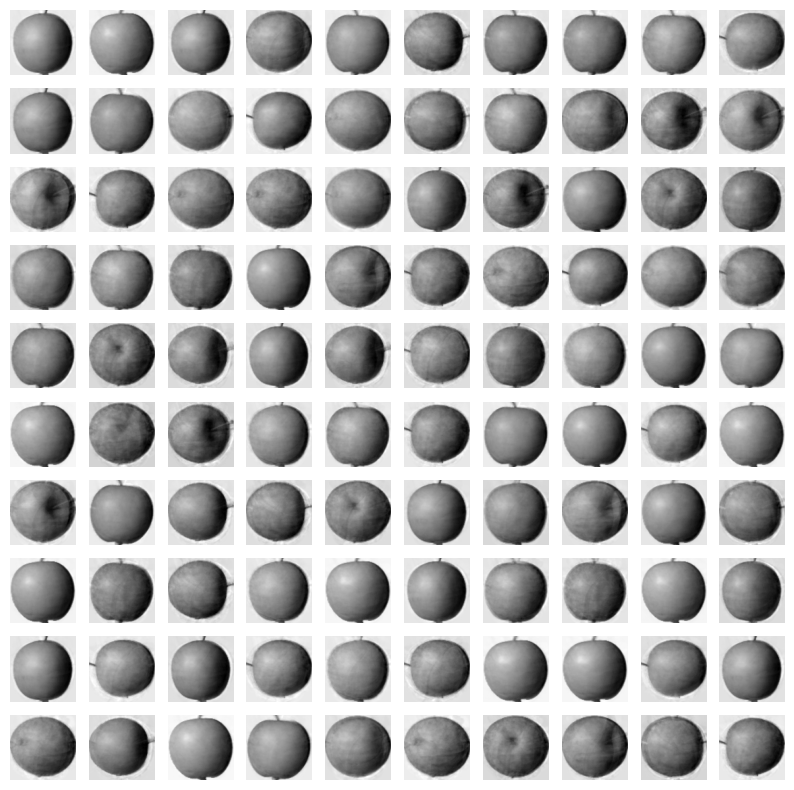

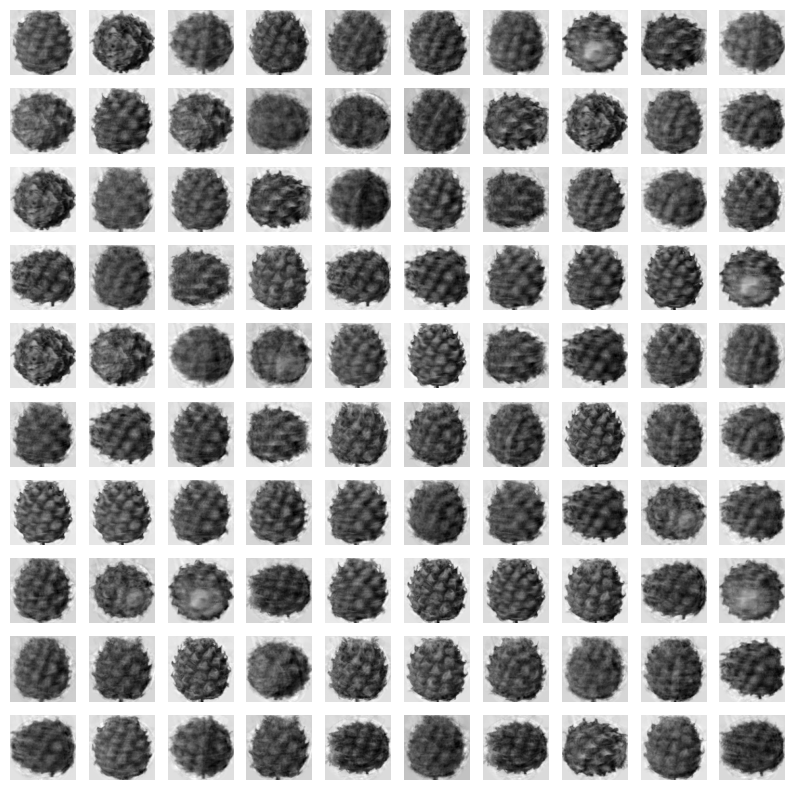

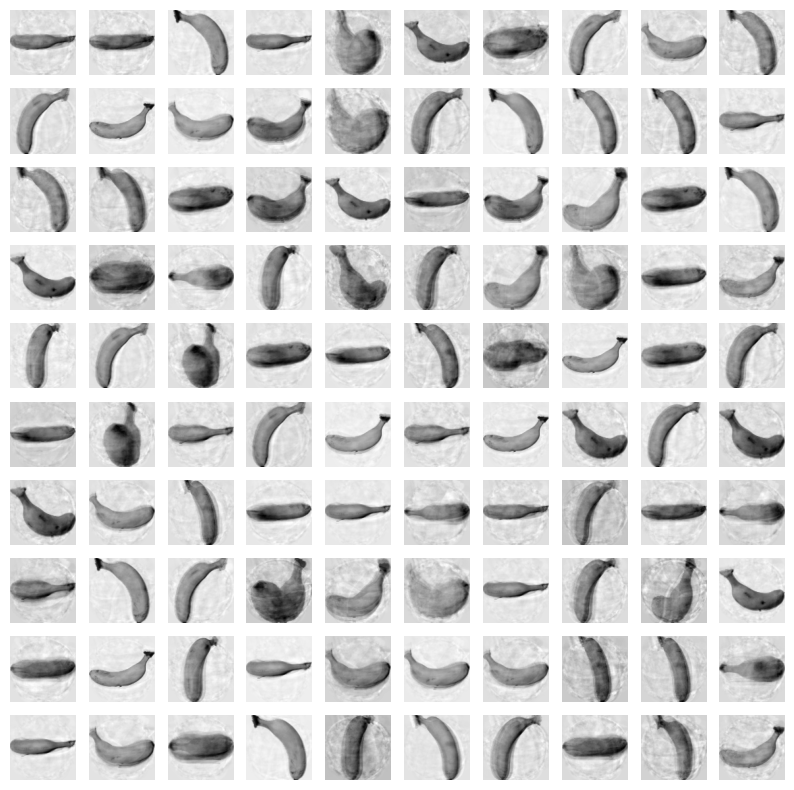

In [35]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [36]:
print(np.sum(pca.explained_variance_ratio_))

0.9215990387522285


In [41]:
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578896, 0.00511202, 0.00486381, 0.00480347,
       0.00447837, 0.00437315, 0.0040804 , 0.00389478, 0.00372443,
       0.00359284, 0.00331471, 0.00317786, 0.0030432 , 0.0030377 ,
       0.0028892 , 0.00275578, 0.00264886, 0.0025594 , 0.00252026,
       0.00247408, 0.00239586, 0.00231014, 0.00222057, 0.00216852,
       0.0021361 , 0.00196615, 0.00192794, 0.00190921, 0.00185144,
       0.00182182, 0.00174205, 0.00169732, 0.00163997, 0.0015867 ])

In [44]:
sum(pca.explained_variance_ratio_)

0.9215990387522288

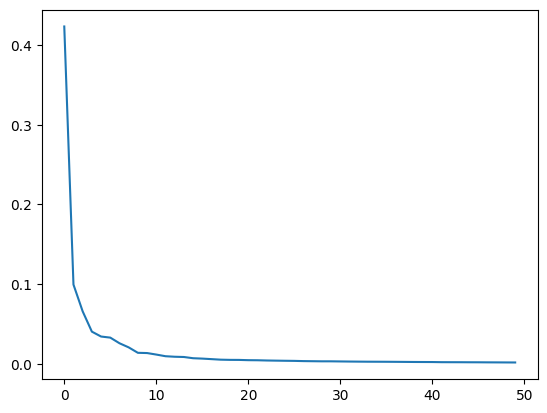

In [42]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
# 차원 축소 후에도 모델의 성능이 줄어들지 않는지 검증

### 다른 알고리즘과 함께 사용하기

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [39]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [52]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.6714366912841797


In [51]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.009908771514892578


In [54]:
# 차원 축소
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [57]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state=42)
km.fit(fruits_pca)

c:\anaconda3\envs\cv2\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

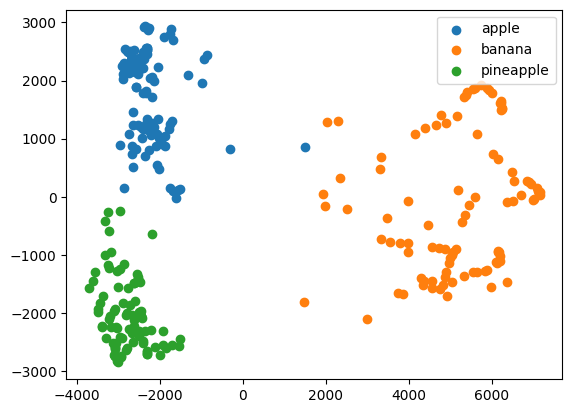

In [58]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0 ], data[:, 1])

plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [59]:
# 연습문제